# Comparación de Modelos

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

In [1]:
# Librerías base
import time
import numpy as np
import pandas as pd
# Funciones de densidad y muestrear de ellas
import scipy.stats as st
import scipy.special as fun
# Gráficos
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Criterios de información

Las medidas de **precisión predictiva** (interna) se denominan **criterios de información** y normalmente se definen en función de la **devianza** (*deviance*):
$$-2\,\text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}})\,.$$

El factor $-2$ se utiliza para emular el estadístico asociado con la **prueba de razón de verosimilitud** (*Likelihood-ratio test*):
$$
\lambda = -2\,\frac{\text{sup}_{\theta\in\Theta_0} L(\theta)}{\text{sup}_{\theta\in\Theta} L(\theta)}
$$
donde $L(\cdot)$ es la función de verosimilitud.

No se debe elegir necesariamente elegir el modelo con la devianza más baja. Es necesario **hacer una corrección** de cuánto aumentará la precisión predictiva (ajuste del modelo) teniendo en cuenta el **número de parámetros**.

Es de interés la **precisión de la predicción** por dos razones:

- Cuantificar el rendimiento del modelo.
- Comparar modelos. 

Hay varios **métodos disponibles para estimar la precisión predictiva** sin utilizar datos fuera de la muestra (validación cruzada).

***Devieance Information Criterion*** (DIC) es una versión Bayesiana del ***Akaike Infomation Criterion*** (AIC, $\text{AIC}=-2\,\text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{MLE}})+2k$, con $k$ el número de parámetros):
$$
\text{DIC} = -2\,\text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) + 2p_{\text{DIC}}
$$
donde 
$$
\hat{\boldsymbol{\theta}}_{\text{Bayes}} = \textsf{E}(\boldsymbol{\theta}\mid\boldsymbol{y})\approx\frac{1}{B}\sum_{b=1}^B \boldsymbol{\theta}^{(b)}
$$
es la media posterior de $\boldsymbol{\theta}$ y 
$$
p_{\text{DIC}} = 2\left( \text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) - \textsf{E}( \text{log}\,p(\boldsymbol{y}\mid\boldsymbol{\theta})  \mid \boldsymbol{y} ) \right) \approx 2\left( \text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) - \frac{1}{B}\sum_{b=1}^B \text{log}\,p\left(\boldsymbol{y}\mid \boldsymbol{\theta}^{(b)}\right)  \right)
$$
es el **número efectivo de parámetros**.

- ***Spiegelhalter, D. J., Best, N. G., Carlin, B. P., & Van Der Linde, A. (2002). Bayesian measures of model complexity and fit. Journal of the royal statistical society: Series b (statistical methodology), 64(4), 583-639.***
- ***Spiegelhalter, D. J., Best, N. G., Carlin, B. P., & Van der Linde, A. (2014). The deviance information criterion: 12 years on. Journal of the Royal Statistical Society: Series B: Statistical Methodology, 485-493.***

Similarmente, el ***Watanabe-Akaike or widely available information criterion*** (WAIC) se define como:
$$
\text{WAIC} = -2\text{lppd} + 2p_{\text{WAIC}}
$$
donde
$$
\text{lppd} = \text{log}\prod_{i=1}^n p(y_i\mid\boldsymbol{y}) = \sum_{i=1}^n\text{log}\int_\Theta p (y_i\mid\boldsymbol{\theta})p(\boldsymbol{\theta}\mid\boldsymbol{y}) \approx \sum_{i=1}^n\text{log}\left(\frac{1}{B}\sum_{b=1}^B p\left(y_i\mid\boldsymbol{\theta^{(b)}}\right)\right)
$$
es la log densidad predictiva puntual (que como la devianza resume la precisión predictiva del modelo ajustado a los datos), y
$$
p_{\text{WAIC}} = 2\sum_{i=1}^n\left( \text{log}\,\textsf{E}(p(y_i\mid\boldsymbol{\theta})\mid\boldsymbol{y}) - \textsf{E}(\text{log}\,p(y_i\mid\boldsymbol{\theta})\mid\boldsymbol{y}) \right) \approx 
2\sum_{i=1}^n\left(\text{log}\left( \frac{1}{B}\sum_{b=1}^B p\left(y_i\mid\boldsymbol{\theta}^{(b)}\right) \right) - \frac{1}{B}\sum_{b=1}^B \text{log}\,p\left(y_i\mid \boldsymbol{\theta}^{(b)} \right)\right) 
$$
es el **número efectivo de parámetros**.

- ***Watanabe, S., & Opper, M. (2010). Asymptotic equivalence of Bayes cross validation and widely applicable information criterion in singular learning theory. Journal of machine learning research, 11(12).***
- ***Gelman, A., Hwang, J., & Vehtari, A. (2014). Understanding predictive information criteria for Bayesian models. Statistics and computing, 24(6), 997-1016.***

El WAIC es un enfoque más Bayesiano para estimar la precisión predictiva fuera de la muestra, comenzando con la **densidad predictiva posterior logarítmica** (lppd) y luego agregando un factor de corrección para el número efectivo de parámetros para ajustar por sobreajuste.

También existe el llamado ***Bayesian Information Criterion*** que se calcula a partir del número de parámetros ajustados con una penalización que aumenta con el tamaño de la muestra:
$$
\text{BIC} =  -2\,\text{log}\,p(\boldsymbol{y}\mid\hat{\boldsymbol{\theta}}_{\text{Bayes}}) + k\,\text{log}(n)
$$
donde $k$ es el número de parámetros del modelo y $n$ es el tamaño de la muestra.

El BIC difiere del DIC en que no está motivado por una estimación del ajuste predictivo sino por el objetivo de aproximar la densidad de probabilidad marginal de los datos, $p(\boldsymbol{y})$.

## 2 Ejemplo: Puntajes de Matemáticas

Los conjuntos de datos de los archivos `SB11_1.txt` contiene una muestra aleatoria del **código del departamento de ubicación del colegio** y el **puntaje de matemáticas de los estudiantes que presentaron la Prueba Saber 11 del primer semestre de 2020**. Estos datos son de carácter público y están disponibles en https://www.icfes.gov.co. 
Se recomienda consultar la *Guía de orientación Saber 11* (Icfes, 2020) para obtener más detalles sobre la prueba. 

La prueba de matemáticas se obtiene mediante un **modelo 3PL** (modelo logístico de 3 parámetros que define la probabilidad de responder correctamente de un individuo, en función de su habilidad, la dificultad del ítem, la discriminación del ítem y el pseudo-azar) y tiene una **escala de 0 a 100** (sin decimales), con **puntaje promedio de 50 puntos** y **desviación estándar 10 puntos** (Icfes, 2018, *Guía de diseño, producción, aplicación y calificación del examen Saber 11*, p. 33).

El objetivo es **construir un modelo predictivo para el puntaje de matemáticas a nivel nacional**, tomando como datos de entrenamiento (*training data*) los resultados del primer semestre de 2020, con el fin de **hacer inferencias sobre la población de estudiantes tanto a nivel nacional como departamental**. Por lo tanto, se toma como variable de agrupamiento el departamento de ubicación del colegio del estudiante. El *Diccionario de variables Saber 11* contiene la información detallada sobre las variables de las bases de datos.

### 2.1 Estructura de los datos

- $y_{i,j}$:       puntaje de matemáticas del estudiante $i$ y en departamento $j$.
- $n_j\,\,$:       número de estudiantes en el departamento $j$.
- $\bar{y}_j\,\,$: promedio muestral del departamento $j$.
- $s^2_j\,\,$:     varianza muestral del departamento $j$.

In [2]:
# datos
SB11_1 = pd.read_csv("SB11_1_muestra.txt",sep = ' ',encoding = "UTF-8")
SB11_1.shape

(1544, 2)

In [3]:
# codigo departamentos
# https://www.fopep.gov.co/wp-content/uploads/2019/02/Tabla-C%C3%B3digos-Dane.pdf
codigo = [5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 41, 44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76, 81, 85, 86, 88, 91, 94, 95, 97, 99]
nombre = ["ANTIOQUIA", "ATLANTICO", "BOGOTA", "BOLIVAR", "BOYACA", "CALDAS", "CAQUETA", "CAUCA", "CESAR", "CORDOBA", "CUNDINAMARCA", "CHOCO", "HUILA", "LA GUAJIRA", "MAGDALENA", "META", "NARINO", "N. SANTANDER", "QUINDIO", "RISARALDA", "SANTANDER", "SUCRE", "TOLIMA", "VALLE DEL CAUCA", "ARAUCA", "CASANARE", "PUTUMAYO", "SAN ANDRES", "AMAZONAS", "GUAINIA", "GUAVIARE", "VAUPES", "VICHADA"]
datos = pd.DataFrame({'codigo' : codigo, 'nombre' : nombre})
# base de datos con nombres
SB11_1 = SB11_1.merge(datos,on = 'codigo', how = 'left')
# numero de estuduantes por departamento
SB11_1['nombre'].value_counts(sort = False)

ANTIOQUIA           71
ATLANTICO           37
BOGOTA             395
BOLIVAR             18
BOYACA               9
CALDAS              13
CAQUETA              5
CAUCA               70
CESAR               18
CORDOBA              5
CUNDINAMARCA        94
HUILA                9
LA GUAJIRA           6
MAGDALENA            7
META                16
NARINO              55
N. SANTANDER        12
QUINDIO              4
RISARALDA           22
SANTANDER           18
TOLIMA               6
VALLE DEL CAUCA    643
ARAUCA               1
CASANARE             2
PUTUMAYO             8
Name: nombre, dtype: int64

In [4]:
# remover departamentos con un solo estudiante
SB11_1 = SB11_1[SB11_1.nombre != "ARAUCA"]
SB11_1['nombre'].value_counts(sort = False)
SB11_1.index = range(SB11_1.shape[0])

In [5]:
# m: numero de grupos (departamentos)
# n: numero de individuos (estudiantes)
m = len(SB11_1['nombre'].unique())
m

24

In [6]:
n = sum(SB11_1['nombre'].value_counts(sort = False))
n

1543

In [7]:
# y  : puntajes de los estudiantes (np.array)
# Y  : puntajes de los estudiantes (dict)
# g  : identificador secuencial de los departamentos (np.array)
# nj : numero de estudiantes en cada departamento (np.array)
# yb : promedios de los puntajes (np.array)
# s2 : varianzas de los puntajes (np.array)
# respuesta por grupos
y = SB11_1.puntaje
Y = {}
g = np.empty(n)
for j in range(m):
    idx = SB11_1.codigo == SB11_1.codigo.unique()[j]
    g[idx] = j
    Y[j] = y[idx]
estadisticos = SB11_1.groupby(['codigo','nombre']).agg(nj = ('puntaje',len), # Total
                                                       yb = ('puntaje',np.mean), # Media
                                                       s2 = ('puntaje',lambda x: np.var(x,ddof=1))) # Varianza
round(estadisticos.head(6),1)

,,nj,yb,s2
codigo,nombre,,,
5,ANTIOQUIA,71,59.1,270.4
8,ATLANTICO,37,62.1,123.2
11,BOGOTA,395,60.9,229.8
13,BOLIVAR,18,57.8,227.8
15,BOYACA,9,52.3,68.5
17,CALDAS,13,64.2,407.8


In [8]:
nj = np.array(estadisticos.nj)
yb = np.array(estadisticos.yb)
s2 = np.array(estadisticos.s2)

### 2.2 Modelamiento

- $\textsf{M}_1$: Modelo jerárquico Normal con medias específicas.

- $\textsf{M}_2$: Modelo jerárquico Normal con medias y varianzas específicas.

### 2.3 Distribución previa


Teniendo en cuenta la información de la prueba, el modelo se ajusta utilizando los siguientes hiperparámetros: 
$$
\mu_0 = 50\,,\qquad
\gamma^2_0 = 25\,,\qquad
\eta_0 = 1\,,\qquad
\tau^2_0 = 100\,,\qquad
\lambda_0 = 1\,,\qquad
\alpha_0 = 1\,,\qquad
\beta_0 = 1/100\,.
$$

### 2.4 Ajuste del modelo

In [9]:
# algoritmo modelo 1
def MCMC_1(B,nj,yb,s2):
    # tamaños
    n = np.sum(nj)
    m = len(nj)
    # hiperparametros
    mu0 = 50
    g20 = 25
    eta0 = 1  
    t20  = 100
    nu0  = 1  
    s20  = 100
    # valores iniciales
    theta = yb
    sig2  = np.mean(s2)
    mu    = np.mean(theta)
    tau2  = np.var(theta,ddof = 1)
    # almacenamiento
    THETA = []
    LL = []
    # cadena
    for b in range(B):
        # actualizar theta
        vtheta = 1/(1/tau2 + nj/sig2)
        theta = st.norm.rvs(vtheta*(mu/tau2 + nj*yb/sig2),
                            scale = np.sqrt(vtheta),
                            size = m)
        # actualizar sigma^2
        sig2 = st.invgamma.rvs(a = (nu0 + n)/2, 
                               scale = (nu0*s20 + np.sum((nj - 1)*s2 + nj*(yb - theta)**2))/2,
                               size = 1)
        # actualizar mu
        vmu = 1/(1/g20 + m/tau2)
        mu = st.norm.rvs(vmu*(mu0/g20 + m*np.mean(theta)/tau2),
                        scale = np.sqrt(vmu),
                        size = 1)
        # actualizar tau^2
        tau2 = st.invgamma.rvs(a = (eta0 + m)/2, 
                               scale = (eta0*t20 + m*np.var(theta) + m*(np.mean(theta) - mu)**2)/2,
                               size = 1)
        # almacenar valores
        THETA.append(list(theta)+[sig2[0],mu[0],tau2[0]])
        # log-verosimilitud
        LL.append(np.sum(
            st.norm.logpdf(x = y, loc = np.repeat(theta,nj), scale = np.sqrt(sig2))
        ))
    # fin de la cadena
    # salida
    THETA = pd.DataFrame(THETA,
                         columns = ['theta'+str(k+1) for k in range(m)]+['sig2','mu','tau2'])
    LL = pd.DataFrame(LL, columns = ['ll'])
    return {'THETA' : THETA, 'LL' : LL}


In [10]:
# algoritmo modelo 2
def MCMC_2(B,nj,yb,s2):
    # tamaños
    n = np.sum(nj)
    m = len(nj)
    # hiperparametros
    mu0  = 50
    g20  = 25
    eta0 = 1
    t20  = 100
    lam0 = 1
    al0  = 1
    be0  = 1/100
    nus0 = np.linspace(1,50,num = 50) # rango en p(nu | rest)
    # valores iniciales
    theta = yb
    sig2  = s2 # sigma_j^2
    mu    = np.mean(theta)
    tau2  = np.var(theta,ddof = 1)
    nu    = 1
    ups2  = 100 # sigma^2
    # almacenamiento
    THETA = []
    LL = []
    # cadena
    for b in range(B):
        # actualizar theta
        vtheta = 1/(1/tau2 + nj/sig2)
        theta = st.norm.rvs(vtheta*(mu/tau2 + nj*yb/sig2),
                            scale = np.sqrt(vtheta),
                            size = m)
        # actualizar sigma_j^2
        sig2 = st.invgamma.rvs(a = (nu + nj)/2,
                               scale = (nu*ups2 + (nj-1)*s2 + nj*(yb - theta)**2)/2,
                               size = m)
        # actualizar mu
        vmu = 1/(1/g20 + m/tau2)
        mu = st.norm.rvs(vmu*(mu0/g20 + m*np.mean(theta)/tau2),
                        scale = np.sqrt(vmu))
        # actualizar tau^2
        tau2 = st.invgamma.rvs(a = (eta0 + m)/2, 
                               scale = (eta0*t20 + m*np.var(theta) + m*(np.mean(theta) - mu)**2)/2)   
        # actualizar nu
        lpnu = 0.5*m*nus0*np.log(0.5*nus0*ups2) - m*fun.loggamma(0.5*nus0) - 0.5*nus0*np.sum(np.log(sig2)) - nus0*(lam0 + 0.5*ups2*np.sum(1/sig2))
        nu = np.random.choice(a = nus0, p = np.exp(lpnu)/np.sum(np.exp(lpnu))) # Las probabilidades deben sumar 1
        # actualizar sigma^2
        ups2 = st.gamma.rvs(a = al0 + m*nu/2, scale = 1/(be0 + nu/2*np.sum(1/sig2)))
        # almacenar valores
        THETA.append(list(theta)+list(sig2)+[mu,tau2,nu,ups2])
        # log-verosimilitud
        LL.append(np.sum(
            st.norm.logpdf(x = y, loc = np.repeat(theta,nj), scale = np.sqrt(np.repeat(sig2,nj)) 
        )))
    # fin de la cadena
    # salida
    THETA = pd.DataFrame(THETA,
                         columns = ['theta'+str(k+1) for k in range(m)]+['sig2'+str(k+1) for k in range(m)]+['mu','tau2','nu','ups2'])
    LL = pd.DataFrame(LL, columns = ['ll'])
    return {'THETA' : THETA, 'LL' : LL}

In [11]:
# ajuste del modelo
t = time.time()
np.random.seed(1)
B = 25000
cadena1_M1 = MCMC_1(B,nj,yb,s2)
print(time.time() - t,"sec elapsed")

23.945558071136475 sec elapsed


In [12]:
# ajuste del modelo
t = time.time()
np.random.seed(12)
B = 25000
cadena1_M2 = MCMC_2(B,nj,yb,s2)
print(time.time() - t,"sec elapsed")

33.63677382469177 sec elapsed


### 2.5 Log-verosimilitud

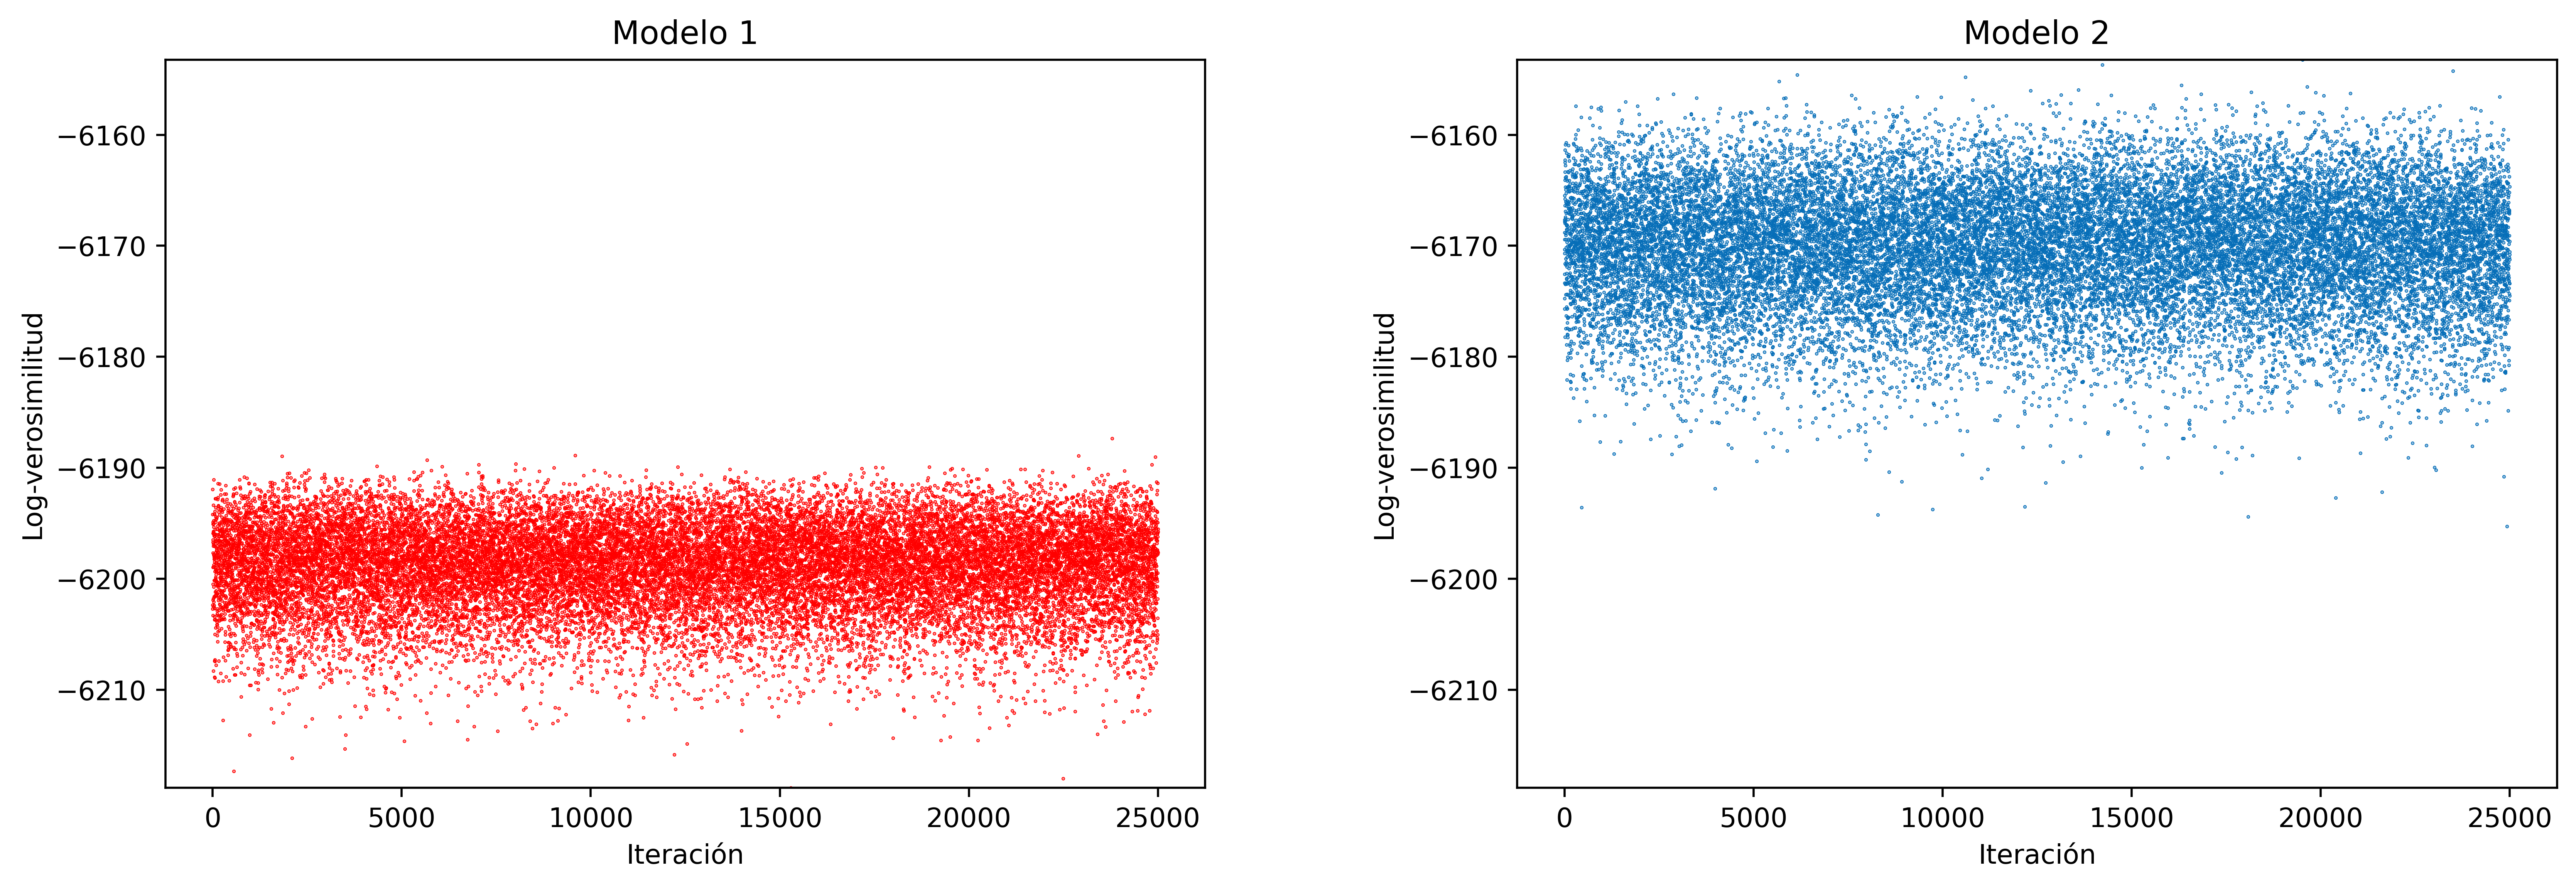

In [13]:
# cadenas
f, axes = plt.subplots(1, 2, figsize = (16,5),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
yrange = (np.min(list(cadena1_M1['LL'].ll)+list(cadena1_M2['LL'].ll)),
         np.max(list(cadena1_M1['LL'].ll)+list(cadena1_M2['LL'].ll)))
#
axes[0].scatter(range(B),cadena1_M1['LL'].ll,c = 'red',s=0.1)
axes[0].set_xlabel('Iteración')
axes[0].set_ylabel('Log-verosimilitud')
axes[0].set_title('Modelo 1')
axes[0].set_ylim(yrange)
#
axes[1].scatter(range(B),cadena1_M2['LL'].ll,c = '#066EB8',s=0.1)
axes[1].set_xlabel('Iteración')
axes[1].set_ylabel('Log-verosimilitud')
axes[1].set_title('Modelo 2')
axes[1].set_ylim(yrange)
#
plt.show()

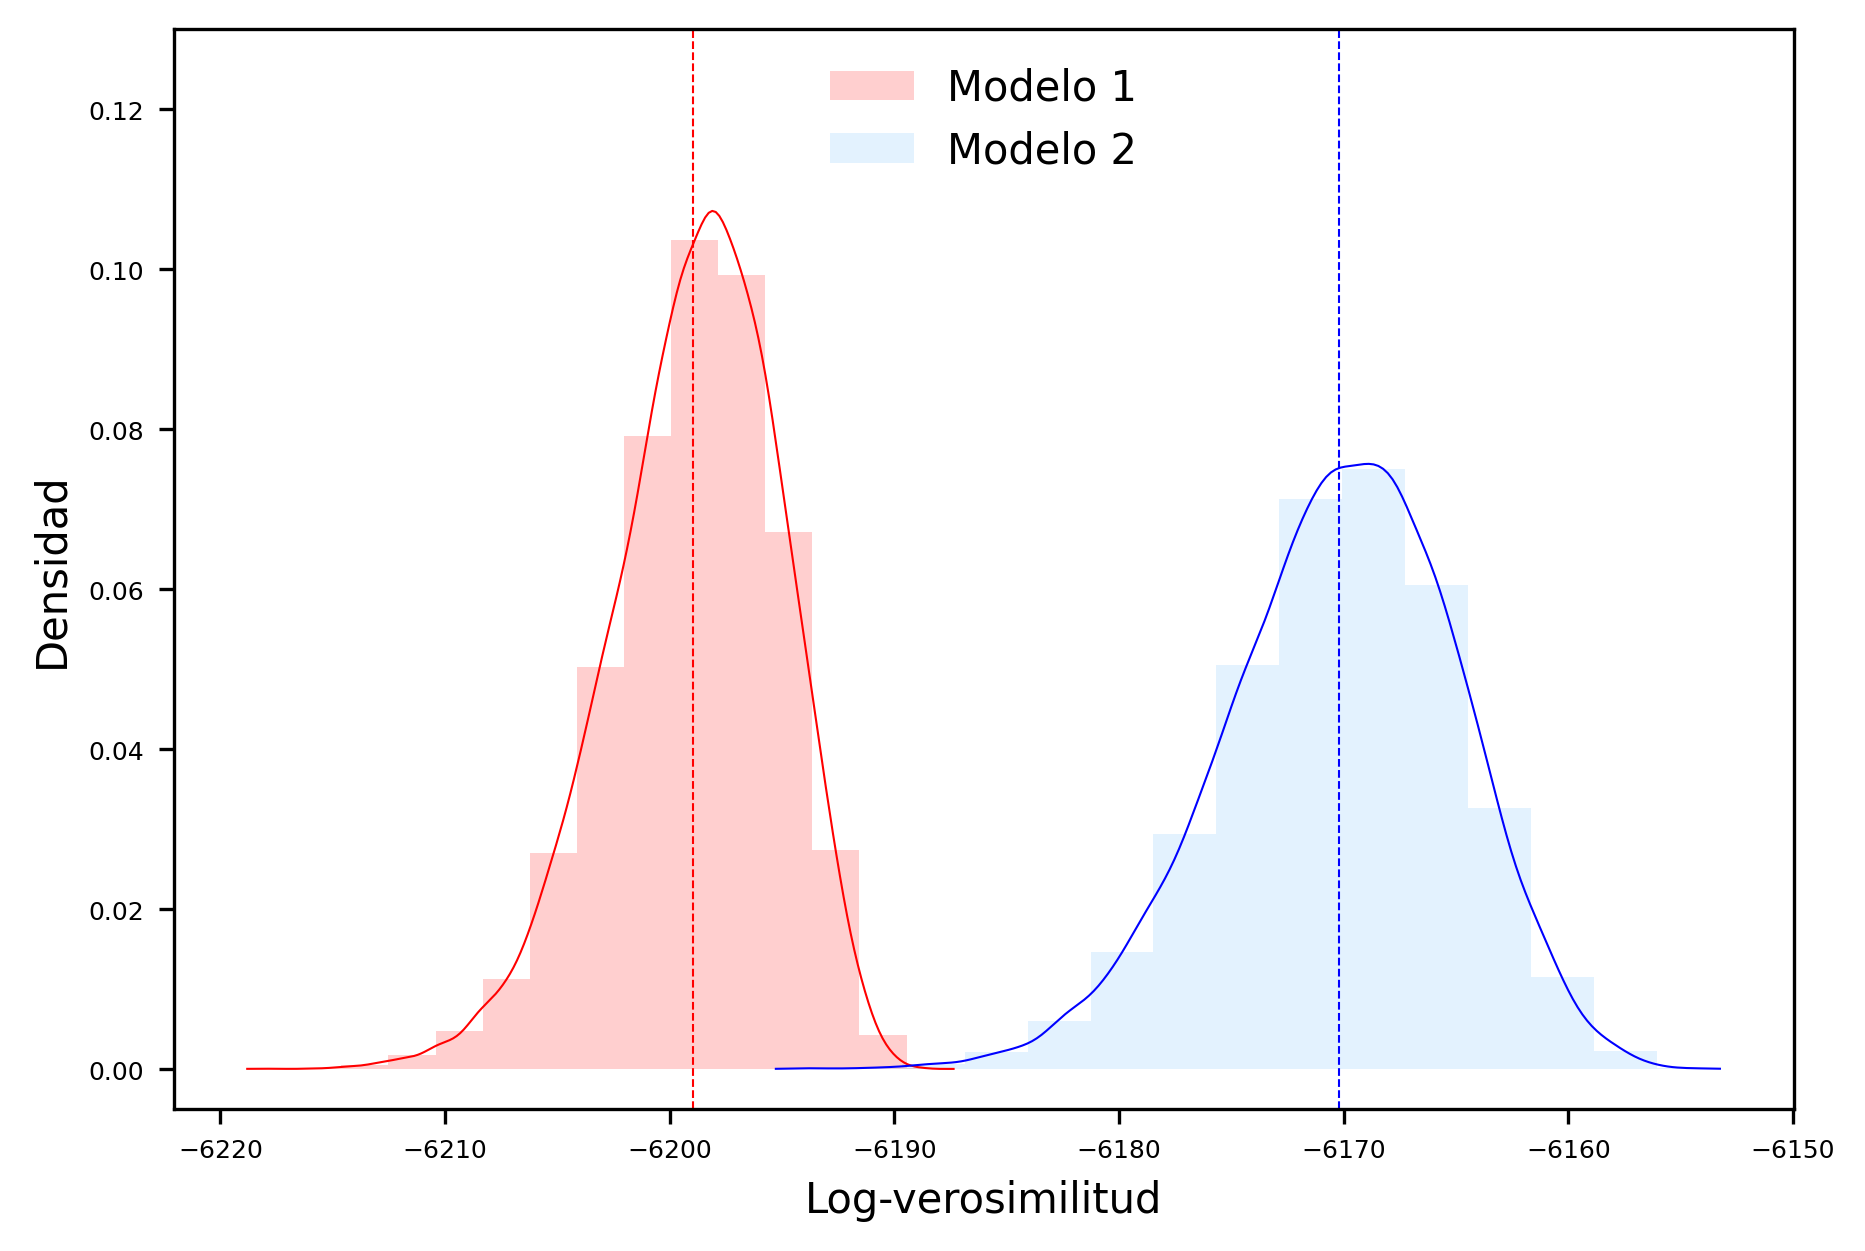

In [14]:
# gráfico log-verosimilitud
LP1 = np.array(cadena1_M1['LL'].ll)
LP2 = np.array(cadena1_M2['LL'].ll)
#
f = plt.figure(figsize = (6,4), dpi = 300)
ax = f.add_axes([0.1,0.1,0.9,0.9])
#
ax.hist(LP1,density = True,bins = 15,color = '#ff000030',label = 'Modelo 1')
ax.hist(LP2,density = True,bins = 15,color = '#6CBFFD30',label = 'Modelo 2')
#
lp1_grid = np.linspace(np.min(LP1),np.max(LP1),num = 200)
lp2_grid = np.linspace(np.min(LP2),np.max(LP2),num = 200)
ax.plot(lp1_grid,st.gaussian_kde(LP1)(lp1_grid),color = '#ff0000',linewidth = 0.5)
ax.plot(lp2_grid,st.gaussian_kde(LP2)(lp2_grid),color = '#0000ff',linewidth = 0.5)
#
ax.axvline(np.mean(LP1),color = '#ff0000',ls = '--',linewidth = 0.5)
ax.axvline(np.mean(LP2),color = '#0000ff',ls = '--',linewidth = 0.5)
#
ax.set_xlabel('Log-verosimilitud')
ax.set_ylabel('Densidad')
ax.set_ylim((-0.005,0.13))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend(loc = 'upper center',frameon = False)
#
plt.show()

### 2.6 Criterios de información

In [15]:
# DIC M1
LP1 = np.array(cadena1_M1['LL'].ll)
theta_hat  = np.mean(np.array(cadena1_M1['THETA'])[:,:m],axis = 0)
sigma2_hat = np.mean(cadena1_M1['THETA'].sig2)
lpyth_m1   = np.sum(st.norm.logpdf(y,np.repeat(theta_hat,nj),scale = np.sqrt(sigma2_hat)))
pDIC_m1    = 2*(lpyth_m1 - np.mean(LP1))
dic_m1     = -2*lpyth_m1 + 2*pDIC_m1
# WAIC M1
lppd_m1  = 0
pWAIC_m1 = 0
for i in range(n):
    # lppd
    tmp1      = st.norm.pdf(y[i], np.array(cadena1_M1['THETA'])[:,int(g[i])],
                            scale = np.sqrt(cadena1_M1['THETA'].sig2))
    lppd_m1  += np.log(np.mean(tmp1))
    # pWAIC
    tmp2      = st.norm.logpdf(y[i], np.array(cadena1_M1['THETA'])[:,int(g[i])],
                               scale = np.sqrt(cadena1_M1['THETA'].sig2))
    pWAIC_m1 += 2*(np.log(np.mean(tmp1)) - np.mean(tmp2))

waic_m1 = -2*lppd_m1 + 2*pWAIC_m1
# BIC M1
k_m1 = m + 3
bic_m1 = -2*lpyth_m1 + k_m1*np.log(n)

In [17]:
# DIC M2
LP2 = np.array(cadena1_M2['LL'].ll)
theta_hat  = np.mean(np.array(cadena1_M2['THETA'])[:,:m],axis = 0)
sigma2_hat = np.mean(np.array(cadena1_M2['THETA'])[:,m:(2*m)],axis = 0)
lpyth_m2   = np.sum(st.norm.logpdf(y,np.repeat(theta_hat,nj),
                                   scale = np.repeat(np.sqrt(sigma2_hat),nj)))
pDIC_m2    = 2*(lpyth_m2 - np.mean(LP2))
dic_m2     = -2*lpyth_m2 + 2*pDIC_m2
# WAIC M2
lppd_m2  = 0
pWAIC_m2 = 0
for i in range(n):
    # lppd
    tmp1      = st.norm.pdf(y[i], np.array(cadena1_M2['THETA'])[:,int(g[i])],
                            scale = np.sqrt(np.array(cadena1_M2['THETA'])[:,int(m+g[i])]))
    lppd_m2  += np.log(np.mean(tmp1))
    # pWAIC
    tmp2      = st.norm.logpdf(y[i], np.array(cadena1_M2['THETA'])[:,int(g[i])],
                               scale = np.sqrt(np.array(cadena1_M2['THETA'])[:,int(m+g[i])]))
    pWAIC_m2 += 2*(np.log(np.mean(tmp1)) - np.mean(tmp2))

waic_m2 = -2*lppd_m2 + 2*pWAIC_m2
# BIC M1
k_m2 = 2*m + 4
bic_m2 = -2*lpyth_m2 + k_m2*np.log(n)

In [18]:
# tabla de resumen
tab = pd.DataFrame([
    [lpyth_m1 ,lpyth_m2 ],
    [pDIC_m1  ,pDIC_m2  ],
    [dic_m1   ,dic_m2   ],
    [lppd_m1  ,lppd_m2  ],
    [pWAIC_m1 ,pWAIC_m2 ],
    [waic_m1  ,waic_m2  ],
    [bic_m1   ,bic_m2   ]
],columns = ['M1','M2'],
    index = ['lp','pDIC','DIC','lppd','pWAIC','WAIC','BIC'])
round(tab,1)

,M1,M2
lp,-6188.8,-6154.2
pDIC,20.4,32.0
DIC,12418.3,12372.4
lppd,-6189.6,-6155.1
pWAIC,18.6,30.2
WAIC,12416.5,12370.6
BIC,12575.7,12690.2


## Referencias

<img src="Hoffcoverbook.jpg" width = 250 />

<img src="Gelmancoverbook.png" width = 250 />

<img src="Reichcoverbook.jpg" width = 250 />